<a href="https://colab.research.google.com/github/NimaTB/data-science-road-map/blob/MySql_practice/micrograd_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is my practice to learn the basics of how chatGBT works. The code is from [micrograd github repo](https://github.com/karpathy/micrograd) developed by [Andrej Karpathy](https://karpathy.ai/) with some additional notes and useful links that furhter help ML and Data Science enthusiast who are eager to learn. Check this youtube video [The spelled-out intro to neural networks and backpropagation: building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1). 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x +5

In [3]:
f(3.0)

20.0

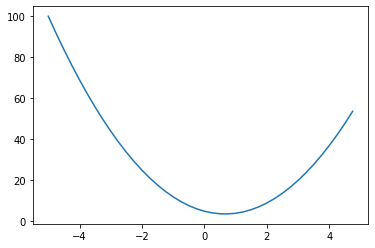

In [7]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

In [11]:
h = 0.00001
x = 3.0
( f(x+h) - f(x) ) / h 

14.00003000000538

In [12]:
h = 0.00001
x = -3.0
( f(x+h) - f(x) ) / h 

-21.999970000052823

In [15]:
h = 0.00001
x = 2/3
( f(x+h) - f(x) ) / h 

3.0000002482211127e-05

In [16]:
# More complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [21]:
h = 0.00001

# Inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
# b += h
# c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', ((d2 - d1)/h))

d1 4.0
d2 4.00001
slope 0.9999999999621422


Skleton of building a value object

More details on [`__repr__`](https://www.programiz.com/python-programming/methods/built-in/repr)

In [44]:
class Value_v1:
  
  def __init__(self, data):
    self.data = data

  def __repr__(self): 
    return f"Value_v1(data={self.data})"

  def __add__(self, other):
    out = Value_v1(self.data + other.data)
    return out

  def __mul__(self, other):
    out = Value_v1(self.data * other.data)
    return out
    

In [45]:
a = Value_v1(2.0)
b = Value_v1(-3.0)
c = Value_v1(10.0)
print('a + b: What happens internally is a.__add__(b) =  ', str(a + b)) 
print('a * b: What happens internally is a.__mul__(b) =  ', str(a * b)) 

a + b: What happens internally is a.__add__(b) =   Value_v1(data=-1.0)
a * b: What happens internally is a.__mul__(b) =   Value_v1(data=-6.0)


In [35]:
d = a * b + c

In [47]:
class Value_v2:
  
  def __init__(self, data, _children=()):
    self.data = data
    self._prev = set(_children)

  def __repr__(self): 
    return f"Value_v2(data={self.data})"

  def __add__(self, other):
    out = Value_v2(self.data + other.data, (self, other))
    return out

  def __mul__(self, other):
    out = Value_v2(self.data * other.data, (self, other))
    return out

In [48]:
a = Value_v2(2.0)
b = Value_v2(-3.0)
c = Value_v2(10.0)

d = a * b + c
d._prev

{Value_v2(data=-6.0), Value_v2(data=10.0)}

In [58]:
class Value_v3:
  
  def __init__(self, data, _children=(), _op = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op

  def __repr__(self): 
    return f"Value_v3(data={self.data})"

  def __add__(self, other):
    out = Value_v3(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value_v3(self.data * other.data, (self, other), '*')
    return out

In [59]:
a = Value_v3(2.0)
b = Value_v3(-3.0)
c = Value_v3(10.0)

d = a * b + c
print(d._prev)
print(d._op)

{Value_v3(data=-6.0), Value_v3(data=10.0)}
+


In [60]:
from graphviz import Digraph
def trace(root):
  # Building a set of all nodes and edges in the graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR: left to right  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # For any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "data %.4f" % (n.data, ), shape='record')
    if n._op:
      # If this value is a result of some operation, create an op node for it 
      dot.node(name = uid + n._op, label = n._op)
      # And connect this node to it
      dot.edge(uid + n._op, uid)
  for n1, n2 in edges:
    # Connect n1 to the op node of n_2
    dot.edge(str(id(n1)), str(id(n2))+ n2._op)

  return dot
  

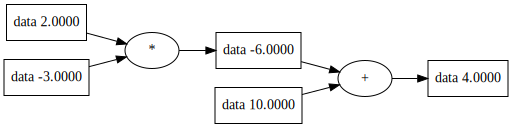

In [61]:
draw_dot(d)

Adding labels to the objects

In [67]:
class Value_v4:
  
  def __init__(self, data, _children=(), _op = '', label=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self): 
    return f"Value_v4(data={self.data})"

  def __add__(self, other):
    out = Value_v4(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value_v4(self.data * other.data, (self, other), '*')
    return out

Changin draw_dot function accordingly to include labels

In [68]:
from graphviz import Digraph
def trace(root):
  # Building a set of all nodes and edges in the graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR: left to right  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # For any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f}" % (n.label, n.data ), shape='record')
    if n._op:
      # If this value is a result of some operation, create an op node for it 
      dot.node(name = uid + n._op, label = n._op)
      # And connect this node to it
      dot.edge(uid + n._op, uid)
  for n1, n2 in edges:
    # Connect n1 to the op node of n_2
    dot.edge(str(id(n1)), str(id(n2))+ n2._op)

  return dot
  

{Value_v4(data=-6.0), Value_v4(data=10.0)}
+


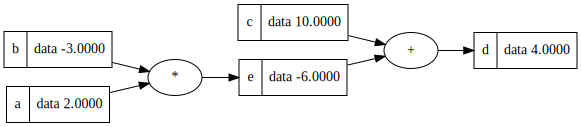

In [69]:
a = Value_v4(2.0, label='a')
b = Value_v4(-3.0, label='b')
c = Value_v4(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
draw_dot(d)

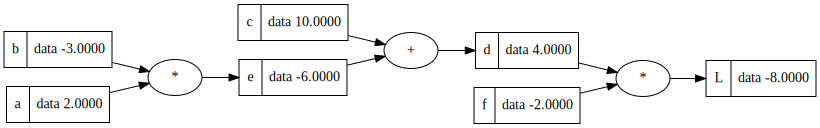

In [72]:
a = Value_v4(2.0, label='a')
b = Value_v4(-3.0, label='b')
c = Value_v4(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value_v4(-2.0, label='f')
L = d*f; L.label = 'L'
draw_dot(L)

In the following, we will add the gradient object in the Value to store the result of the backpropagation (calculating the derivatives of L, w.r.t. to a,b, ...)

In [75]:
class Value_v5:
  
  def __init__(self, data, _children=(), _op = '', label=''):
    self.data = data
    self.grad = 0 # At the initialization, we assume that any values does not affect the Loss Function
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self): 
    return f"Value_v5(data={self.data})"

  def __add__(self, other):
    out = Value_v5(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value_v5(self.data * other.data, (self, other), '*')
    return out

Adding grad in the draw_dot function 

In [74]:
def trace(root):
  # Building a set of all nodes and edges in the graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR: left to right  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # For any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad ), shape='record')
    if n._op:
      # If this value is a result of some operation, create an op node for it 
      dot.node(name = uid + n._op, label = n._op)
      # And connect this node to it
      dot.edge(uid + n._op, uid)
  for n1, n2 in edges:
    # Connect n1 to the op node of n_2
    dot.edge(str(id(n1)), str(id(n2))+ n2._op)

  return dot

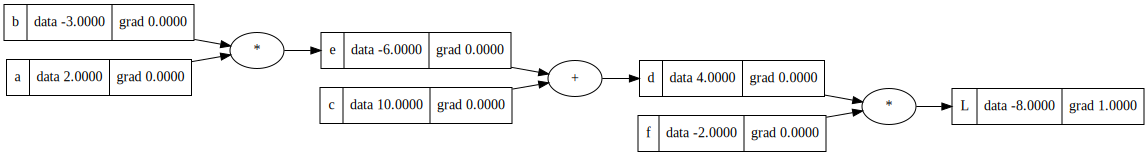

In [85]:
a = Value_v5(2.0, label='a')
b = Value_v5(-3.0, label='b')
c = Value_v5(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value_v5(-2.0, label='f')
L = d*f; L.label = 'L'
L.grad = 1
draw_dot(L)


Backpropagation and derivative idea
$L = d * f$

$\frac{dL}{dd} = ?$

$\frac{g(x+h) - g(x)}{h} = \frac{(d+h)*f - d*f}{h} = f$

now what is $\frac{dd}{dc} ? $

$d = c + e$ 

$\frac{g(x+h) - g(x)}{h} = \frac{(c+h)+e - c+e}{h} = 1$


what is $\frac{dd}{de} ? $

$\frac{g(x+h) - g(x)}{h} = \frac{c+(e+h) - c+e}{h} = 1$

But what we are looking for here is to find $\frac{dL}{dc} = \frac{dL}{dd} * \frac{dd}{dc} $


$e = a * b$ 
Next we want $\frac{dL}{da} = \frac{dL}{de} * \frac{de}{da} $

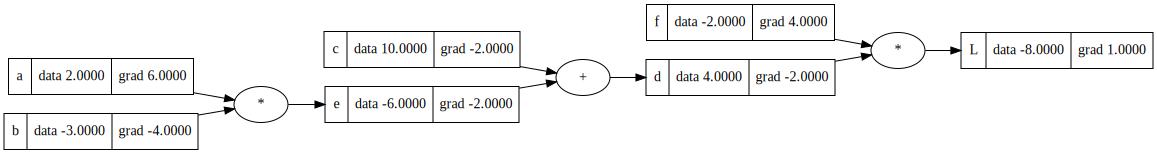

In [102]:

a = Value_v5(2.0, label='a')
b = Value_v5(-3.0, label='b')
c = Value_v5(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value_v5(-2.0, label='f')
L = d*f; L.label = 'L'
L.grad = 1
f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = (-2.0 * -3.0)
b.grad = (-2.0 * 2.0)
draw_dot(L)

We can verify the above derivatives by adding h to any variable $v_{temp}$ to compute $\frac{dL}{d v_{temp}}$

In [103]:
def lol():
  h = 0.0001
  a = Value_v5(2.0, label='a')
  b = Value_v5(-3.0, label='b')
  c = Value_v5(10.0, label='c')
  e = a * b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value_v5(-2.0, label='f')
  L = d*f; L.label = 'L'
  L1 = L.data # L is a Value node, so we want its data


  a = Value_v5(2.0, label='a')
  # a.data += h
  b = Value_v5(-3.0, label='b')
  # b.data += h
  c = Value_v5(10.0, label='c')
  # c.data += h
  e = a * b; e.label = 'e'
  d = e + c; d.label = 'd'
  # d.data += h

  f = Value_v5(-2.0, label='f')
  L = d*f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

0.0


Forward Pass

In [107]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-6.586368000000001


**adding exponent into the `Value` class**

In [118]:
class Value:
  
  def __init__(self, data, _children=(), _op = '', label=''):
    self.data = data
    self.grad = 0 # At the initialization, we assume that any values does not affect the Loss Function
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self): 
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

Building neurons 

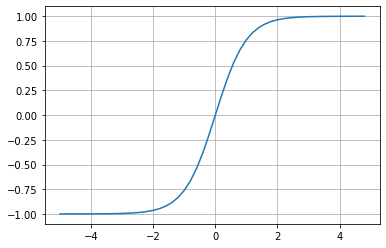

In [119]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

Example 1 to see the impact of tanh

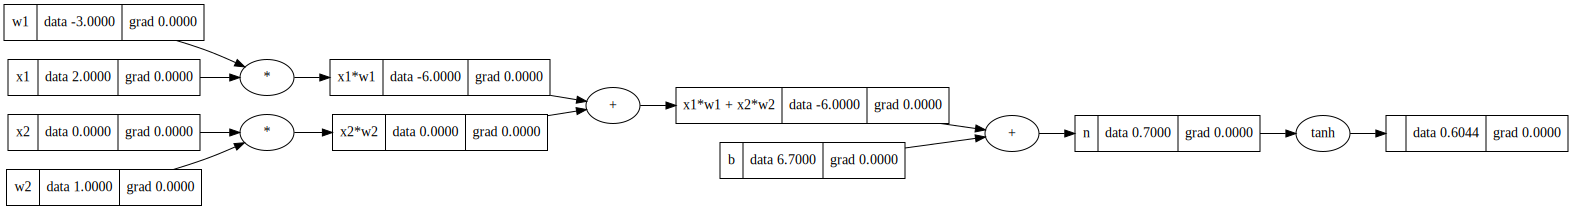

In [120]:
# Inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weigths w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias of the neuron (triger to make the neuron happy!!!)
b = Value(6.7, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh()
# draw_dot(n)
draw_dot(o)

Example 2 by changing the bias to see the impact of tanh

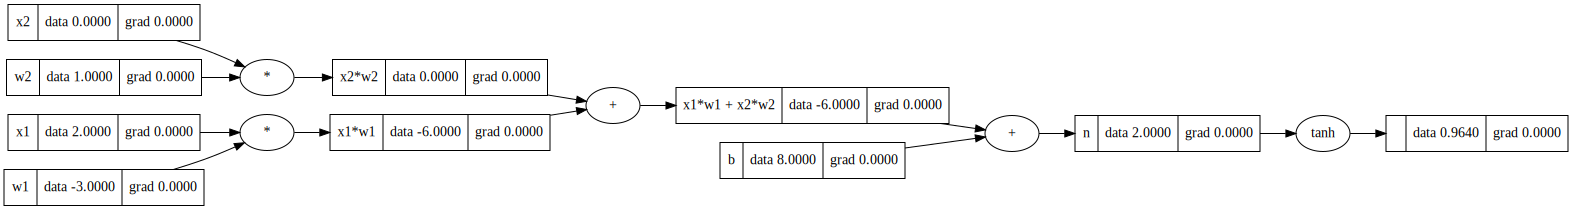

In [122]:
# Inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weigths w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias of the neuron (triger to make the neuron happy!!!)
b = Value(8, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh()
# draw_dot(n)
draw_dot(o)

Example 3 by changing the bias to see the impact of tanh

In [ ]:
# Inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weigths w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias of the neuron (triger to make the neuron happy!!!)
b = Value(6.8813735870195432, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
# draw_dot(n)


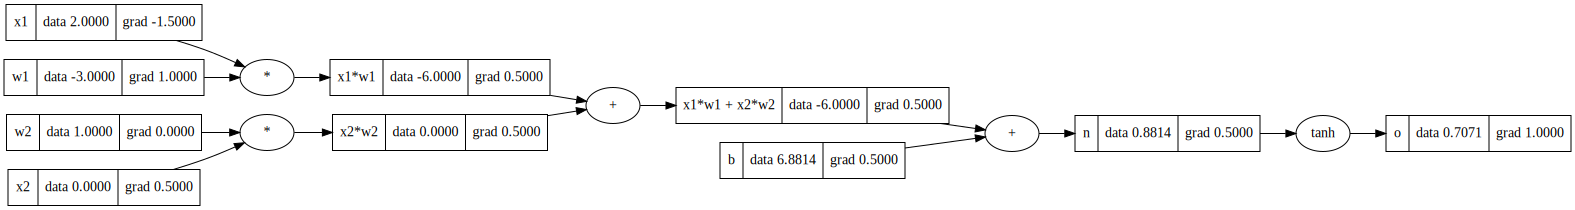

In [137]:
draw_dot(o)

In [126]:
o.grad = 1

if $o = tanh(n)$, then what is the $\frac{do}{dn} = 1- tanh(n)^2 = 1 - o^2$

In [128]:
1 - o.data**2 

0.4999999999999999

In [129]:
n.grad = 0.5

In [131]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [133]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [135]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [136]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad